#Group 6
#Apurv(291049)
#Arshpreet Singh Bagga(291013)
#Anuj Sharma(291070)
#Jumbish S Dang(291032)
#Bikramaditya Guho(291017)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import xgboost as xgb

import time
import warnings
warnings.simplefilter('ignore')

In [ ]:
# adjust Jupyter views
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Read Data
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import io
allstate = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
from google.colab import files
uploaded2 = files.upload()

Saving test.csv to test.csv


In [ ]:
import io
test = pd.read_csv(io.BytesIO(uploaded2['test.csv']))

In [ ]:
from google.colab import files
uploaded3 = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [ ]:
import io
submission = pd.read_csv(io.BytesIO(uploaded3['sample_submission.csv']))

In [ ]:
print(allstate.shape, test.shape, submission.shape)

(188318, 132) (125546, 131) (125546, 2)


In [ ]:
allstate.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [ ]:
test.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,D,B,A,A,A,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
6,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,B,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
9,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,D,B,B,B,B,B,D,C,B,B,B,A,B,A,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
12,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,A,B,D,D,A,A,A,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
15,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [ ]:
allstate.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188318 entries, 1 to 587633
Data columns (total 131 columns):
 #    Column  Dtype  
---   ------  -----  
 0    cat1    object 
 1    cat2    object 
 2    cat3    object 
 3    cat4    object 
 4    cat5    object 
 5    cat6    object 
 6    cat7    object 
 7    cat8    object 
 8    cat9    object 
 9    cat10   object 
 10   cat11   object 
 11   cat12   object 
 12   cat13   object 
 13   cat14   object 
 14   cat15   object 
 15   cat16   object 
 16   cat17   object 
 17   cat18   object 
 18   cat19   object 
 19   cat20   object 
 20   cat21   object 
 21   cat22   object 
 22   cat23   object 
 23   cat24   object 
 24   cat25   object 
 25   cat26   object 
 26   cat27   object 
 27   cat28   object 
 28   cat29   object 
 29   cat30   object 
 30   cat31   object 
 31   cat32   object 
 32   cat33   object 
 33   cat34   object 
 34   cat35   object 
 35   cat36   object 
 36   cat37   object 
 37   cat38   object 
 38   ca

In [ ]:
test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125546 entries, 4 to 587634
Data columns (total 130 columns):
 #    Column  Dtype  
---   ------  -----  
 0    cat1    object 
 1    cat2    object 
 2    cat3    object 
 3    cat4    object 
 4    cat5    object 
 5    cat6    object 
 6    cat7    object 
 7    cat8    object 
 8    cat9    object 
 9    cat10   object 
 10   cat11   object 
 11   cat12   object 
 12   cat13   object 
 13   cat14   object 
 14   cat15   object 
 15   cat16   object 
 16   cat17   object 
 17   cat18   object 
 18   cat19   object 
 19   cat20   object 
 20   cat21   object 
 21   cat22   object 
 22   cat23   object 
 23   cat24   object 
 24   cat25   object 
 25   cat26   object 
 26   cat27   object 
 27   cat28   object 
 28   cat29   object 
 29   cat30   object 
 30   cat31   object 
 31   cat32   object 
 32   cat33   object 
 33   cat34   object 
 34   cat35   object 
 35   cat36   object 
 36   cat37   object 
 37   cat38   object 
 38   ca

In [ ]:
allstate.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [ ]:
test.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000,125546.000000
mean,0.494447,0.506939,0.498255,0.492334,0.487640,0.492188,0.485945,0.487401,0.486015,0.498909,0.494360,0.494033,0.495086,0.495586
std,0.187961,0.206837,0.201746,0.210815,0.209119,0.205574,0.178650,0.199549,0.182134,0.185950,0.210399,0.210148,0.213108,0.222613
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.178568
25%,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.352087,0.317960,0.358970,0.364580,0.310961,0.318249,0.315758,0.294752
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.441525,0.438893,0.441060,0.441450,0.466720,0.457203,0.462286,0.363547,0.406104
75%,0.626630,0.681761,0.634224,0.652072,0.643315,0.659261,0.591284,0.629180,0.568890,0.619840,0.678924,0.682413,0.689974,0.724791
max,0.984975,0.862654,0.944251,0.956046,0.983107,0.997162,1.000000,0.982800,0.995400,0.994980,0.997830,0.997416,0.988494,0.844814


In [ ]:
# evaluate whether any value is missing in train
allstate.isnull().values.any()

False

In [ ]:
# evaluate whether any value is missing in test
test.isnull().values.any()

False

<AxesSubplot:xlabel='loss'>

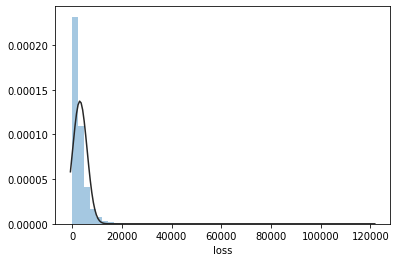

In [ ]:
# asses target
sns.distplot(allstate['loss'], kde=False, fit=norm)

In [ ]:
allstate.describe()['loss']

count    188318.000000
mean       3037.337686
std        2904.086186
min           0.670000
25%        1204.460000
50%        2115.570000
75%        3864.045000
max      121012.250000
Name: loss, dtype: float64

In [ ]:
percent_outliers = sum(allstate['loss']>20000)/len(allstate['loss'])*100
print('Loss less than 20000 accounts for {0:.2f}% of data'.format(percent_outliers))

Loss less than 20000 accounts for 0.23% of data


In [ ]:
# remove data where loss is more than 20000
train=allstate.drop(allstate[allstate['loss']>20000].index)
len(train)

187880

In [ ]:
X = train.copy()
y = np.log(X.pop('loss'))

In [ ]:
non_scalar=list(X.select_dtypes(np.object))

for i in non_scalar:
    X[i] = X[i].astype('category').cat.codes

X.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,1,1,3,3,1,3,2,1,3,1,0,0,0,0,0,3,1,2,4,0,2,15,1,6,0,0,8,4,6,9,6,45,28,2,19,55,0,14,267,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
2,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,3,3,0,1,2,1,3,1,0,0,0,0,0,3,3,2,4,4,3,15,11,5,0,0,4,4,8,10,10,33,65,0,22,38,0,14,85,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
5,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,3,1,3,2,1,1,1,0,0,0,0,0,3,3,2,4,4,0,1,11,14,0,1,4,5,7,5,0,2,85,0,28,5,0,8,153,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
10,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,1,1,3,3,3,1,2,1,3,1,0,0,0,0,0,3,3,2,4,4,3,15,8,3,0,0,4,4,8,10,10,33,67,2,39,4,0,14,79,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
11,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,1,3,1,3,1,1,2,1,1,2,0,0,0,1,5,3,1,3,4,4,0,12,5,9,0,0,3,4,10,6,1,66,50,2,50,38,0,10,55,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled,y,test_size=.1, random_state=43)

In [ ]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)
print(test.shape, submission.shape)

(169092, 130) (169092,) (18788, 130) (18788,)
(125546, 130) (125546, 1)


In [ ]:
# Loading data into DMatrices
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [ ]:
# Build a baseline model

mean_train = np.mean(y_train)
baseline_predictions = np.ones(y_val.shape) * mean_train

mae_baseline = mean_absolute_error(y_val, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 0.66


In [ ]:
# Let’s define it with default values for the moment
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'reg:squarederror',
}

In [ ]:
params['eval_metric'] = "mae"
num_boost_round = 999   # set it to large value

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dval, "Val")],
    early_stopping_rounds=10
)

[0]	Val-mae:5.03051
[1]	Val-mae:3.52189
[2]	Val-mae:2.46600
[3]	Val-mae:1.72919
[4]	Val-mae:1.22327
[5]	Val-mae:0.89148
[6]	Val-mae:0.69087
[7]	Val-mae:0.57688
[8]	Val-mae:0.51449
[9]	Val-mae:0.47947
[10]	Val-mae:0.46049
[11]	Val-mae:0.44944
[12]	Val-mae:0.44343
[13]	Val-mae:0.43867
[14]	Val-mae:0.43571
[15]	Val-mae:0.43304
[16]	Val-mae:0.43185
[17]	Val-mae:0.43013
[18]	Val-mae:0.42900
[19]	Val-mae:0.42751
[20]	Val-mae:0.42686
[21]	Val-mae:0.42617
[22]	Val-mae:0.42511
[23]	Val-mae:0.42457
[24]	Val-mae:0.42411
[25]	Val-mae:0.42354
[26]	Val-mae:0.42320
[27]	Val-mae:0.42244
[28]	Val-mae:0.42231
[29]	Val-mae:0.42199
[30]	Val-mae:0.42166
[31]	Val-mae:0.42148
[32]	Val-mae:0.42129
[33]	Val-mae:0.42132
[34]	Val-mae:0.42137
[35]	Val-mae:0.42120
[36]	Val-mae:0.42127
[37]	Val-mae:0.42109
[38]	Val-mae:0.42067
[39]	Val-mae:0.42056
[40]	Val-mae:0.42041
[41]	Val-mae:0.42029
[42]	Val-mae:0.42006
[43]	Val-mae:0.42001
[44]	Val-mae:0.41998
[45]	Val-mae:0.41989
[46]	Val-mae:0.41982
[47]	Val-mae:0.41974
[4

In [ ]:
print("Best MAE: {:.5f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best MAE: 0.41723 with 100 rounds


In [ ]:
# cross-validation score with our current default parameters
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=43,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
cv_results

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,5.025789,0.001202,5.025861,0.006518
1,3.518700,0.000854,3.518708,0.006316
2,2.464237,0.000616,2.464272,0.005701
3,1.728696,0.000413,1.728656,0.005327
4,1.223155,0.000215,1.223482,0.004735
5,0.891216,0.000486,0.891986,0.003460
6,0.689100,0.000908,0.690728,0.002167
7,0.574021,0.001166,0.576310,0.001519
8,0.510347,0.001191,0.513196,0.001135
9,0.475367,0.001336,0.479039,0.001723


In [ ]:
cv_results['test-mae-mean'].min()

0.4197818

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [ ]:
# define initial best params and MAE
min_mae = float("Inf")
best_params = None

for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    
    # update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    
    # run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=43,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=5
    )
    
    # update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
        
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=9, min_child_weight=5
	MAE 0.42327080000000006 for 33 rounds
CV with max_depth=9, min_child_weight=6
	MAE 0.4230872 for 33 rounds
CV with max_depth=9, min_child_weight=7
	MAE 0.42308 for 38 rounds
CV with max_depth=10, min_child_weight=5
	MAE 0.4246144 for 31 rounds
CV with max_depth=10, min_child_weight=6
	MAE 0.4242952 for 29 rounds
CV with max_depth=10, min_child_weight=7
	MAE 0.4241773999999999 for 28 rounds
CV with max_depth=11, min_child_weight=5
	MAE 0.4264792 for 23 rounds
CV with max_depth=11, min_child_weight=6
	MAE 0.42628639999999995 for 24 rounds
CV with max_depth=11, min_child_weight=7
	MAE 0.4256438 for 21 rounds
Best params: 9, 7, MAE: 0.42308


In [ ]:
params['max_depth'] = 9
params['min_child_weight'] = 7

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None

# start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    
    # update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    
    # run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    
    # update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
        
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
	MAE 0.42337879999999994 for 33 rounds
CV with subsample=1.0, colsample=0.9
	MAE 0.42297340000000005 for 34 rounds
CV with subsample=1.0, colsample=0.8
	MAE 0.42213120000000004 for 38 rounds
CV with subsample=1.0, colsample=0.7
	MAE 0.4226518 for 44 rounds
CV with subsample=0.9, colsample=1.0
	MAE 0.42348860000000005 for 37 rounds
CV with subsample=0.9, colsample=0.9
	MAE 0.4233586000000001 for 37 rounds
CV with subsample=0.9, colsample=0.8
	MAE 0.42361380000000004 for 32 rounds
CV with subsample=0.9, colsample=0.7
	MAE 0.42338240000000005 for 38 rounds
CV with subsample=0.8, colsample=1.0
	MAE 0.4244892 for 36 rounds
CV with subsample=0.8, colsample=0.9
	MAE 0.42442399999999997 for 30 rounds
CV with subsample=0.8, colsample=0.8
	MAE 0.42404459999999994 for 35 rounds
CV with subsample=0.8, colsample=0.7
	MAE 0.4240686 for 35 rounds
CV with subsample=0.7, colsample=1.0
	MAE 0.42582319999999996 for 31 rounds
CV with subsample=0.7, colsample=0.9
	MAE 0

In [ ]:
params['subsample'] = 1.0
params['colsample_bytree'] = 0.8

In [ ]:
%time

min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    
    # update our parameters
    params['eta'] = eta
    
    # run and time CV
    %time 
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics=['mae'],
        early_stopping_rounds=10
    )
    
    # update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs
CV with eta=0.3
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
	MAE 0.42213120000000004 for 38 rounds

CV with eta=0.2
CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs
	MAE 0.41965059999999993 for 58 rounds

CV with eta=0.1
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.54 µs
	MAE 0.41615160000000007 for 154 rounds

CV with eta=0.05
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10 µs
	MAE 0.41466159999999996 for 357 rounds

CV with eta=0.01
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs
	MAE 0.4150526 for 998 rounds

CV with eta=0.005
CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.58 µs
	MAE 0.4245508 for 998 rounds

Best params: 0.05, MAE: 0.41466159999999996


In [ ]:
params['eta'] = .05

In [ ]:
params

{'max_depth': 9,
 'min_child_weight': 7,
 'eta': 0.05,
 'subsample': 1.0,
 'colsample_bytree': 0.8,
 'objective': 'reg:squarederror',
 'eval_metric': 'mae'}

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dval, "Val")],
    early_stopping_rounds=10
)

[0]	Val-mae:6.82736
[1]	Val-mae:6.48609
[2]	Val-mae:6.16183
[3]	Val-mae:5.85385
[4]	Val-mae:5.56128
[5]	Val-mae:5.28334
[6]	Val-mae:5.01931
[7]	Val-mae:4.76837
[8]	Val-mae:4.53012
[9]	Val-mae:4.30377
[10]	Val-mae:4.08868
[11]	Val-mae:3.88441
[12]	Val-mae:3.69037
[13]	Val-mae:3.50611
[14]	Val-mae:3.33104
[15]	Val-mae:3.16467
[16]	Val-mae:3.00666
[17]	Val-mae:2.85663
[18]	Val-mae:2.71408
[19]	Val-mae:2.57874
[20]	Val-mae:2.45020
[21]	Val-mae:2.32811
[22]	Val-mae:2.21204
[23]	Val-mae:2.10183
[24]	Val-mae:1.99725
[25]	Val-mae:1.89807
[26]	Val-mae:1.80393
[27]	Val-mae:1.71466
[28]	Val-mae:1.62992
[29]	Val-mae:1.54959
[30]	Val-mae:1.47355
[31]	Val-mae:1.40173
[32]	Val-mae:1.33376
[33]	Val-mae:1.26969
[34]	Val-mae:1.20913
[35]	Val-mae:1.15213
[36]	Val-mae:1.09852
[37]	Val-mae:1.04814
[38]	Val-mae:1.00090
[39]	Val-mae:0.95668
[40]	Val-mae:0.91553
[41]	Val-mae:0.87703
[42]	Val-mae:0.84132
[43]	Val-mae:0.80807
[44]	Val-mae:0.77718
[45]	Val-mae:0.74846
[46]	Val-mae:0.72201
[47]	Val-mae:0.69764
[4

In [ ]:
non_scalar=list(test.select_dtypes(np.object))

for i in non_scalar:
    test[i] = test[i].astype('category').cat.codes

In [ ]:
test = test.values
dtest = xgb.DMatrix(test)

In [ ]:
predictions = model.predict(dtest)

In [ ]:
predictions=np.exp(predictions)-1
submission['loss']=predictions
submission.to_csv('Result.csv')
submission.head()

,loss
id,
4,2956.826172
6,4077.599365
9,5936.237305
12,2793.833740
15,1929.531738
